## Decision Tree Model

In this example, two different files are used to train and validate the machine learning model.  The features are explicitly mapped to the codes to ensure consistency among the training and test dataframes. 

In [30]:
# import the things we need first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [31]:
# we want to read in the csv files provided, noticed the path down in the read_csv() can be changed as we like.
df_train = pd.read_csv('Decision_Tree_bankloan-train.csv') # read in training data file
df_test = pd.read_csv('Decision_Tree_bankloan-test.csv') # read in testing data file
df_test.head() # show the first five rows of the test data

,Age,Has_job,Own_house,Credit_rating,Outcome
0,young,False,False,fair,No
1,young,False,False,good,No
2,young,True,False,good,Yes
3,young,True,True,fair,Yes
4,young,False,False,fair,No


In [32]:
df_train.head()

,Age,Has_job,Own_house,Credit_rating,Outcome
0,young,False,False,fair,No
1,young,False,False,good,No
2,young,True,False,good,Yes
3,young,True,True,fair,Yes
4,young,False,False,fair,No


### Preprocess the data

We are going to put training and testing data in two dataframe.

In [33]:
df_train

,Age,Has_job,Own_house,Credit_rating,Outcome
0,young,False,False,fair,No
1,young,False,False,good,No
2,young,True,False,good,Yes
3,young,True,True,fair,Yes
4,young,False,False,fair,No
5,middle,False,False,fair,No
6,middle,False,False,good,No
7,middle,True,True,good,Yes
8,middle,False,True,excellent,Yes
9,middle,False,True,excellent,Yes


In [34]:
df_train['Age']

0      young
1      young
2      young
3      young
4      young
5     middle
6     middle
7     middle
8     middle
9     middle
10       old
11       old
12       old
13       old
14       old
Name: Age, dtype: object

In [35]:
# when we construct the dataframe, Pandas automatically set the type of Has_job and Own_house values to Boolean
# we can change it by mapping them to strings

# dictionary for mapping
boolDict = {
    True: 'True',
    False: 'False'
}

# we should only map these two rows
for i in [1,2]:
    df_train.iloc[:, i] = df_train.iloc[:, i].map(boolDict)
    df_test.iloc[:, i] = df_test.iloc[:, i].map(boolDict)

In [36]:
# to customize what value for each feature to be mapped to 
# we can provide a dictionary that has all the mapping rules


mydict = {
    "Yes": 1,
    "No": 0,
    "True": 1,
    "False": 0,
    "young": 0,
    "middle": 1,
    "old": 2,
    "fair" : 0,
    "good" : 1,
    "excellent" : 2    
}

# construct a function that can take a dataframe and
# map all the categorical values in each column according
# to our dictionary
def outcomeTrans(X):
    cols = list(X)
    for i in cols:
        X[i] = X[i].map(mydict)
    return X
        

# mapping for both dataset
outcomeTrans(df_train)
outcomeTrans(df_test)
df_train.head()

,Age,Has_job,Own_house,Credit_rating,Outcome
0,0,0,0,0,0
1,0,0,0,1,0
2,0,1,0,1,1
3,0,1,1,0,1
4,0,0,0,0,0


In [8]:
df_test

,Age,Has_job,Own_house,Credit_rating,Outcome
0,0,0,0,0,0
1,0,0,0,1,0
2,0,1,0,1,1
3,0,1,1,0,1
4,0,0,0,0,0
5,1,0,0,0,0
6,1,0,0,1,0


We have the data prepared. 

In [37]:
# RUN THIS
# set training data variable & target
# set testing data variable & target
x_train = df_train.iloc[:, 0:4]
y_train = df_train['Outcome']
x_test = df_test.iloc[:, 0:4]
y_test = df_test['Outcome']

In [10]:
x_train

,Age,Has_job,Own_house,Credit_rating
0,0,0,0,0
1,0,0,0,1
2,0,1,0,1
3,0,1,1,0
4,0,0,0,0
5,1,0,0,0
6,1,0,0,1
7,1,1,1,1
8,1,0,1,2
9,1,0,1,2


In [11]:
x_test

,Age,Has_job,Own_house,Credit_rating
0,0,0,0,0
1,0,0,0,1
2,0,1,0,1
3,0,1,1,0
4,0,0,0,0
5,1,0,0,0
6,1,0,0,1


### Train the Model

In [38]:
# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model. All parameters can be omited to use default ones.
# details please check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train) # train our model

c:\Users\nanzmyo\AppData\Local\anaconda3\envs\mla\lib\site-packages\sklearn\utils\validation.py:753: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\nanzmyo\AppData\Local\anaconda3\envs\mla\lib\site-packages\sklearn\utils\validation.py:591: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\nanzmyo\AppData\Local\anaconda3\envs\mla\lib\site-packages\sklearn\utils\validation.py:600: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


DecisionTreeClassifier()

### Evaluate the model

In [39]:
x_train

,Age,Has_job,Own_house,Credit_rating
0,0,0,0,0
1,0,0,0,1
2,0,1,0,1
3,0,1,1,0
4,0,0,0,0
5,1,0,0,0
6,1,0,0,1
7,1,1,1,1
8,1,0,1,2
9,1,0,1,2


In [14]:
y_train

0     0
1     0
2     1
3     1
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    0
Name: Outcome, dtype: int64

In [40]:
y_pred = dt.predict(x_test) # let the model predict the test data

c:\Users\nanzmyo\AppData\Local\anaconda3\envs\mla\lib\site-packages\sklearn\utils\validation.py:753: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\nanzmyo\AppData\Local\anaconda3\envs\mla\lib\site-packages\sklearn\utils\validation.py:591: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\nanzmyo\AppData\Local\anaconda3\envs\mla\lib\site-packages\sklearn\utils\validation.py:600: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [16]:
y_test

0    0
1    0
2    1
3    1
4    0
5    0
6    0
Name: Outcome, dtype: int64

In [17]:
y_pred

array([0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [42]:
print(y_pred) # what the model predict entertainment labels
print(y_test) # true labels


[0 0 1 1 0 0 0]
0    0
1    0
2    1
3    1
4    0
5    0
6    0
Name: Outcome, dtype: int64


In [43]:
## we can use the model to predict any data

print(dt.predict([[1, 0, 1,1]])) 
print(dt.predict([[1, 0, 0,1]])) 

[1]
[0]


c:\Users\nanzmyo\AppData\Local\anaconda3\envs\mla\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\nanzmyo\AppData\Local\anaconda3\envs\mla\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [45]:
x_test_simple = [[1, 0, 1,1]]
y_test_simple = [1]
y_pred_simple = dt.predict(x_test_simple)
print(y_test_simple)
print(y_pred_simple)


[1]
[1]


c:\Users\nanzmyo\AppData\Local\anaconda3\envs\mla\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Visualize the Decision Tree

we can use `graphviz` to see what the decision tree looks like

First, run this in the directory this file is in
```
conda install python-graphviz
```

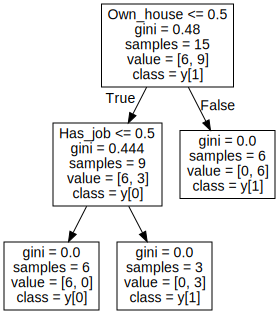

In [46]:
# show the decision tree model
# import graphviz and sklearn.tree first
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file

#Gini Index(Own_house) = 1 - [(6/15)^2 + (9/15)^2] =  0.48

#Gini split(False Own_house, has_job) = 1 - [(6/9)^2 + (3/9)^2] = 0.44

#Own_house <=0.5 (True) mean Not Own_house
#Own_house <=0.5 (False) = >0.5 mean Own_house

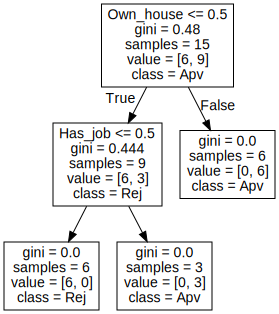

In [48]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=['Rej', 'Apv'], feature_names= x_train.columns)) # display the tree, with no output file